In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import heapq
import numpy as np
import christofides_p as cr
import graph_utils as gu


In [2]:
# helper function
def print_graph(G):

    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G,k=1000, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

 
    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Tests

In [ ]:
graphs = []
for i in range(5,6):
    print(f"Running for i={i}")

    for _ in range(20):
        connected = False
        G = gu.generer_graphe_tsp(i)
        while not connected:
            number_of_edges = len(G.edges())
            k = (i-2)/number_of_edges
            len_blockages_less_i = False
            while not len_blockages_less_i:
                blockages = gu.generer_blockages(G, percentage=k)
                len_blockages_less_i = len(blockages) < (i - 1)
            print(f'Len blockages {len(blockages)}')
            G_verify = G.copy()
            G_verify.remove_edges_from(blockages)
            connected = nx.is_connected(G_verify)
            print("Regenerating")
        graphs.append([G,blockages])
        G_cr_tour = cr.canadian_traveller_cyclic_routing(G,blockages)
        print("-----------")
        assert(nx.algorithms.has_eulerian_path(G_cr_tour))

Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 3), (3, 2), (2, 4), (4, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 4), (4, 3), (3, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 4), (4, 3), (3, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 2), (2, 3), (3, 4), (4, 1), (1, 2), (2, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 4), (4, 3), (3, 0)]
-----------
Running for i=5
K=0.3
Len blockages 3
Regenerating
[(0, 1), (1, 2), (2, 4), (4, 3), (3, 0)]
-----------
Running for i=5
K=0.3
Len blockages 3
Regenerating
[(0, 1), (1, 3), (3, 4), (4, 2), (2, 0)]
-----------
Running for i=5
K=0.3
Len blockages 2
Regenerating
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 3), (3, 0)]
-----------
Running for i=5
K=0.3
Len blockages 3
Re

In [41]:
nx.algorithms.has_eulerian_path(G_cr_tour)

False

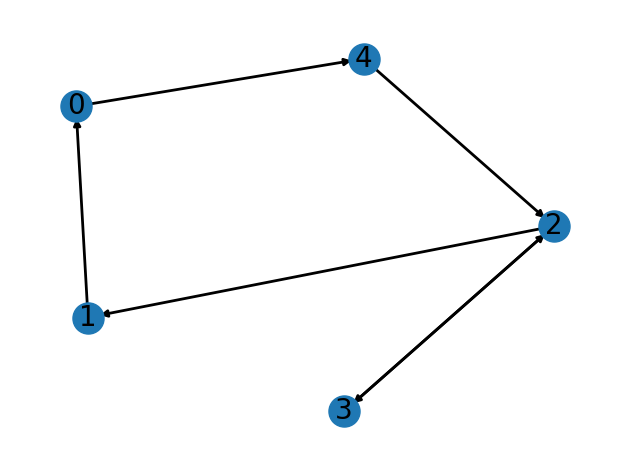

In [11]:
print_graph(G_cr_tour)

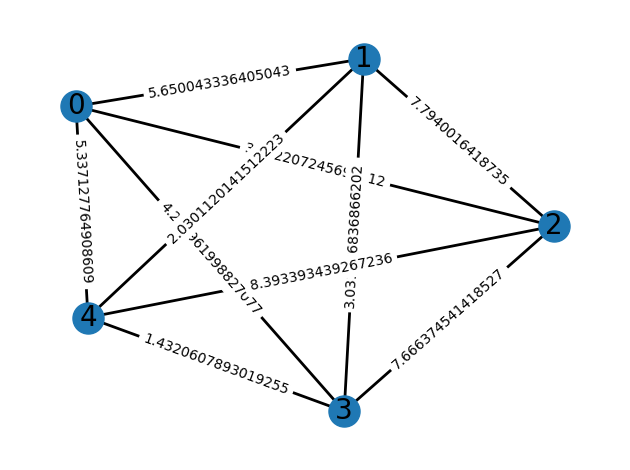

In [18]:
print_graph(G)

In [19]:
G.remove_edges_from(graphs[0][1])

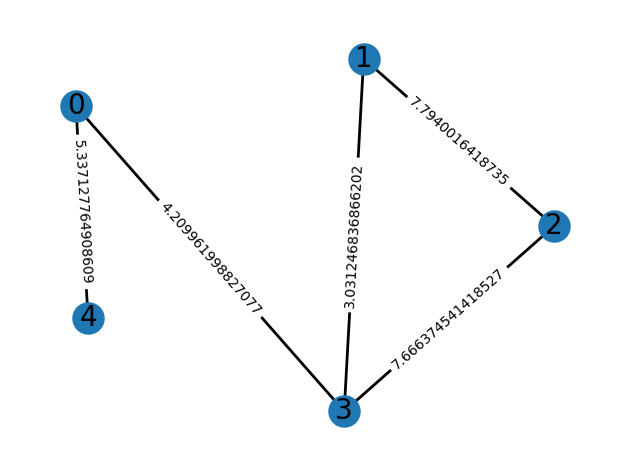

True

In [20]:
print_graph(G)
nx.is_connected(G)

In [28]:
G_cr_tour = cr.canadian_traveller_cyclic_routing(graphs[0][0],blockages)

KeyboardInterrupt: 

In [24]:
G_relabled = nx.relabel_nodes(G, {1: 0, 4: 1, 3: 2, 0: 3, 2: 4})


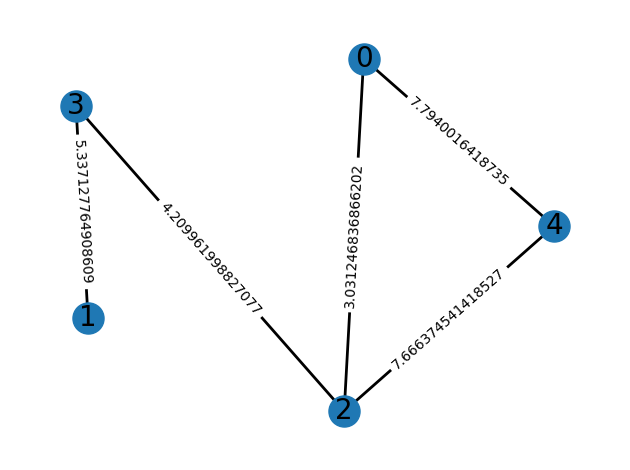

In [25]:
print_graph(G_relabled)

In [27]:
nx.algorithms.has_eulerian_path(G_relabled)

True